In [1]:
%run Data_manipulation.ipynb

# Loading data

In [2]:
NIFTY = pd.read_csv('D:/UFG/Data collection/NIFTY.csv')
NIFTY['Date']= pd.to_datetime(NIFTY['Date'], format='%Y-%m-%d')
scaled_data_NIFTY, scaler_NIFTY = scale_data(NIFTY)
df_residuals_NIFTY, df_trend_NIFTY, df_seasonal_NIFTY, decomposition_results_NIFTY = transform_to_stationary(scaled_data_NIFTY)
NIFTY.set_index('Date', inplace=True)
scaled_data_NIFTY.set_index('Date', inplace=True)

In [3]:
IBOV = pd.read_csv('D:/UFG/Data collection/IBOV.csv')
IBOV['Date']= pd.to_datetime(IBOV['Date'], format='%Y-%m-%d')
scaled_data_IBOV, scaler_IBOV = scale_data(IBOV)
df_residuals_IBOV, df_trend_IBOV, df_seasonal_IBOV, decomposition_results_IBOV = transform_to_stationary(scaled_data_IBOV)
IBOV.set_index('Date', inplace=True)
scaled_data_IBOV.set_index('Date', inplace=True)

In [4]:
# Align the data by merging on the date index
aligned_data = pd.merge(NIFTY['Close'], IBOV['Close'], left_index=True, right_index=True, suffixes=('_NIFTY', '_IBOV'))
aligned_data.head()

,Close_NIFTY,Close_IBOV
Date,,
2000-01-03,1592.2,16930.0
2000-01-04,1638.7,15851.0
2000-01-05,1595.8,16245.0
2000-01-06,1617.6,16107.0
2000-01-07,1613.3,16309.0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate log returns
aligned_data['Log_Return_NIFTY'] = np.log(aligned_data['Close_NIFTY'] / aligned_data['Close_NIFTY'].shift(1))
aligned_data['Log_Return_IBOV'] = np.log(aligned_data['Close_IBOV'] / aligned_data['Close_IBOV'].shift(1))

# Drop missing values resulting from shift operation
aligned_data = aligned_data.dropna()

# Display head of the dataset
aligned_data.head()


,Close_NIFTY,Close_IBOV,Log_Return_NIFTY,Log_Return_IBOV
Date,,,,
2000-01-04,1638.70,15851.0,0.028787,-0.065855
2000-01-05,1595.80,16245.0,-0.026528,0.024553
2000-01-06,1617.60,16107.0,0.013568,-0.008531
2000-01-07,1613.30,16309.0,-0.002662,0.012463
2000-01-10,1632.95,17022.0,0.012106,0.042790


In [6]:
# Calculate average log returns
average_log_return_nifty = aligned_data['Log_Return_NIFTY'].mean()
average_log_return_ibov = aligned_data['Log_Return_IBOV'].mean()

# Annualize log returns
annualized_log_return_nifty = average_log_return_nifty * 252
annualized_log_return_ibov = average_log_return_ibov * 252

# Risk-free rate - US bonds
risk_free_rate = 0.04

# Calculate volatility (standard deviation of log returns, annualized)
volatility_nifty = aligned_data['Log_Return_NIFTY'].std() * np.sqrt(252)
volatility_ibov = aligned_data['Log_Return_IBOV'].std() * np.sqrt(252)

# Calculate Sharpe Ratio
sharpe_ratio_nifty = (annualized_log_return_nifty - risk_free_rate) / volatility_nifty
sharpe_ratio_ibov = (annualized_log_return_ibov - risk_free_rate) / volatility_ibov

# Calculate Sortino Ratio (assuming downside deviation is the same as volatility for simplicity)
downside_deviation_nifty = aligned_data[aligned_data['Log_Return_NIFTY'] < risk_free_rate]['Log_Return_NIFTY'].std() * np.sqrt(252)
downside_deviation_ibov = aligned_data[aligned_data['Log_Return_IBOV'] < risk_free_rate]['Log_Return_IBOV'].std() * np.sqrt(252)
sortino_ratio_nifty = (annualized_log_return_nifty - risk_free_rate) / downside_deviation_nifty
sortino_ratio_ibov = (annualized_log_return_ibov - risk_free_rate) / downside_deviation_ibov

# Convert annualized returns and volatility to percentages
annualized_log_return_nifty_pct = annualized_log_return_nifty * 100
annualized_log_return_ibov_pct = annualized_log_return_ibov * 100
volatility_nifty_pct = volatility_nifty * 100
volatility_ibov_pct = volatility_ibov * 100

# Present results
print("Performance Metrics Comparison between NIFTY and IBOVESPA")
print("------------------------------------------------------------")
print(f"{'Metric':<30} {'NIFTY':>11} {'IBOVESPA':>12}")
print("------------------------------------------------------------")
print(f"{'Annualized Log Return (%)':<30} {annualized_log_return_nifty_pct:>10.2f}% {annualized_log_return_ibov_pct:>10.2f}%")
print(f"{'Volatility (%)':<30} {volatility_nifty_pct:>10.2f}% {volatility_ibov_pct:>10.2f}%")
print(f"{'Sharpe Ratio':<32} {sharpe_ratio_nifty:>10.4f} {sharpe_ratio_ibov:>10.4f}")
print(f"{'Sortino Ratio':<32} {sortino_ratio_nifty:>10.4f} {sortino_ratio_ibov:>10.4f}")


Performance Metrics Comparison between NIFTY and IBOVESPA
------------------------------------------------------------
Metric                               NIFTY     IBOVESPA
------------------------------------------------------------
Annualized Log Return (%)           11.53%       8.59%
Volatility (%)                      22.68%      28.28%
Sharpe Ratio                         0.3318     0.1625
Sortino Ratio                        0.3539     0.1761


### *Sharpe ratio measures the performance of an investment such as a security or portfolio compared to a risk-free asset, after adjusting for its risk.*

### *The Sortino ratio measures the risk-adjusted return of an investment asset, portfolio, or strategy. It is a modification of the Sharpe ratio but penalizes only those returns falling below a user-specified target or required rate of return, while the Sharpe ratio penalizes both upside and downside volatility equally.*

In [7]:
# Calculate rolling volatility
aligned_data['Rolling_Volatility_NIFTY'] = aligned_data['Log_Return_NIFTY'].rolling(window=21).std() * np.sqrt(252)
aligned_data['Rolling_Volatility_IBOV'] = aligned_data['Log_Return_IBOV'].rolling(window=21).std() * np.sqrt(252)

# Calculate Value at Risk (VaR) at 95% confidence level
var_95_nifty = np.percentile(aligned_data['Log_Return_NIFTY'], 5)
var_95_ibov = np.percentile(aligned_data['Log_Return_IBOV'], 5)

# Calculate Conditional Value at Risk (CVaR) at 95% confidence level
cvar_95_nifty = aligned_data['Log_Return_NIFTY'][aligned_data['Log_Return_NIFTY'] <= var_95_nifty].mean()
cvar_95_ibov = aligned_data['Log_Return_IBOV'][aligned_data['Log_Return_IBOV'] <= var_95_ibov].mean()

# Calculate correlation between log returns
correlation = aligned_data['Log_Return_NIFTY'].corr(aligned_data['Log_Return_IBOV'])

# Convert VaR and CVaR to percentages
var_95_nifty_pct = var_95_nifty * 100
var_95_ibov_pct = var_95_ibov * 100
cvar_95_nifty_pct = cvar_95_nifty * 100
cvar_95_ibov_pct = cvar_95_ibov * 100

# Present results
print("Risk Metrics Comparison between NIFTY and IBOVESPA")
print("----------------------------------------------------------------")
print(f"{'Metric':<30} {'NIFTY':>15} {'IBOVESPA':>15}")
print("----------------------------------------------------------------")
print(f"{'VaR 95%':<30} {var_95_nifty_pct:>14.2f}% {var_95_ibov_pct:>14.2f}%")
print(f"{'CVaR 95%':<30} {cvar_95_nifty_pct:>14.2f}% {cvar_95_ibov_pct:>14.2f}%")
print(f"{'Correlation':<30} {correlation:>14.4f}")


Risk Metrics Comparison between NIFTY and IBOVESPA
----------------------------------------------------------------
Metric                                   NIFTY        IBOVESPA
----------------------------------------------------------------
VaR 95%                                 -2.18%          -2.75%
CVaR 95%                                -3.50%          -4.11%
Correlation                            0.2817


### *Value at Risk (VaR) is a risk management metric that estimates the maximum potential loss of an investment or portfolio over a specified time period at a given confidence level. In simpler terms, it answers the question: "How much could I lose with a certain probability over a specific period?"*

### *Conditional Value at Risk (CVaR), also known as Expected Shortfall, is a risk measure that provides an estimate of the average loss that would occur in the worst-case scenarios beyond the VaR threshold. It answers the question: "If the loss exceeds VaR, what is the average loss?"*

### *The magnitude of 0.2840 suggests that while there is some relationship between the movements of these two indices, it is not particularly strong. In other words, the returns of NIFTY and IBOVESPA move in the same direction on average, but the relationship is not strong enough to reliably predict one based on the other.*

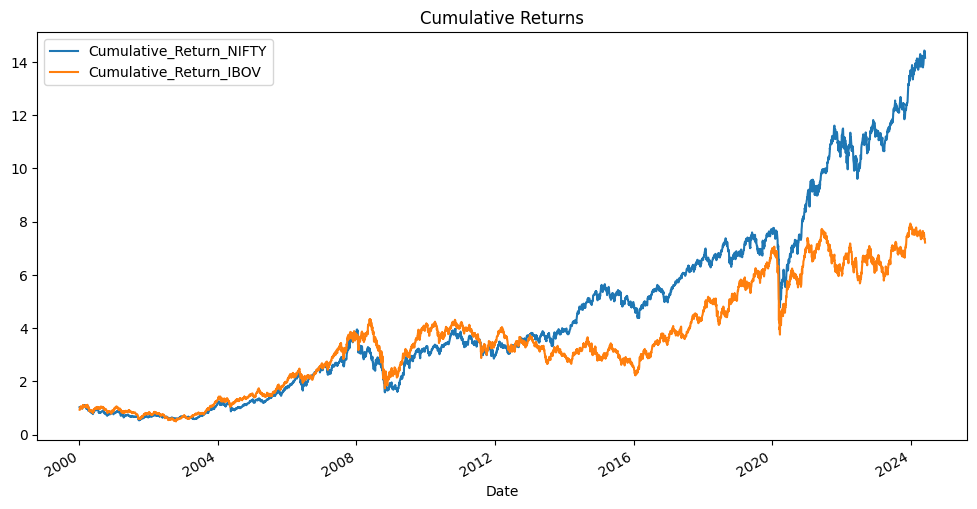

In [8]:

# Plot cumulative returns
aligned_data['Cumulative_Return_NIFTY'] = np.exp(aligned_data['Log_Return_NIFTY'].cumsum())
aligned_data['Cumulative_Return_IBOV'] = np.exp(aligned_data['Log_Return_IBOV'].cumsum())

aligned_data[['Cumulative_Return_NIFTY', 'Cumulative_Return_IBOV']].plot(figsize=(12, 6), title='Cumulative Returns')
plt.show()
